In [16]:
import pandas as pd
import csv
import matplotlib.pyplot as plot

Read in data:

In [7]:
weighted = pd.DataFrame.from_csv('199GamesWeighted-20-100.csv')

Split data by positions of MCTS AI:

In [11]:
p1 = weighted.loc[weighted['Player 1 Type'] == 3]
p2 = weighted.loc[weighted['Player 2 Type'] == 3]
p3 = weighted.loc[weighted['Player 3 Type'] == 3]
p4 = weighted.loc[weighted['Player 4 Type'] == 3]

print("Number of games from each position:")
print("Player 1: " + str(p1.shape[0]))
print("Player 2: " + str(p2.shape[0]))
print("Player 3: " + str(p3.shape[0]))
print("Player 4: " + str(p4.shape[0]))

Number of games from each position:
Player 1: 48
Player 2: 48
Player 3: 65
Player 4: 39


Games where the MCTS AI won:

In [14]:
p1_wins = p1.loc[p1['Winner'] == 1]
p2_wins = p2.loc[p2['Winner'] == 2]
p3_wins = p3.loc[p3['Winner'] == 3]
p4_wins = p4.loc[p4['Winner'] == 4]

print("Number of wins from each position:")
print("Player 1: " + str(p1_wins.shape[0]))
print("Player 2: " + str(p2_wins.shape[0]))
print("Player 3: " + str(p3_wins.shape[0]))
print("Player 4: " + str(p4_wins.shape[0]))

Number of wins from each position:
Player 1: 34
Player 2: 41
Player 3: 48
Player 4: 30


Win rate for each position:

In [15]:
print("Win rate for each position:")
print("Player 1: " + str(p1_wins.shape[0] / p1.shape[0]))
print("Player 2: " + str(p2_wins.shape[0] / p2.shape[0]))
print("Player 3: " + str(p3_wins.shape[0] / p3.shape[0]))
print("Player 4: " + str(p4_wins.shape[0] / p4.shape[0]))

Win rate for each position:
Player 1: 0.7083333333333334
Player 2: 0.8541666666666666
Player 3: 0.7384615384615385
Player 4: 0.7692307692307693


Graph the win rates as a bar graph:

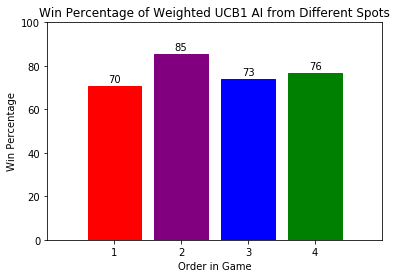

In [41]:
height = [p1_wins.shape[0] / p1.shape[0] * 100, p2_wins.shape[0] / p2.shape[0] * 100, \
         p3_wins.shape[0] / p3.shape[0] * 100, p4_wins.shape[0] / p4.shape[0] * 100]
fig, ax = plot.subplots()
bar = ax.bar([1, 2, 3, 4], height, align='center', tick_label=[1, 2, 3, 4])
bar[0].set_color('r')
bar[2].set_color('b')
bar[1].set_color('purple')
bar[3].set_color('g')
plot.title("Win Percentage of Weighted UCB1 AI from Different Spots")
plot.ylabel('Win Percentage')
plot.xlabel('Order in Game')
ax.axis([0, 5, 0, 100])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(bar)

plot.show()

Overall win percentage:

In [40]:
num_wins = p1_wins.shape[0] + p2_wins.shape[0] + p3_wins.shape[0] + p4_wins.shape[0]
num_plays = p1.shape[0] + p2.shape[0] + p3.shape[0] + p4.shape[0]
print("Total Number of Wins: " + str(num_wins))
print("Total Number of Games Played: " + str(num_plays))
print("Overall Win Rate: " + str(100 * num_wins / num_plays) + "%")

Total Number of Wins: 153
Total Number of Games Played: 200
Overall Win Rate: 76.5%
